In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load data
data = pd.read_csv('iris_data.csv')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
# Getting to know the attributes of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [11]:
# the number of data points.
data.shape[0]

# the column names
data.columns.to_list()

# data type of each column
data.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [6]:
data.describe()


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [24]:
# the number of each species present
data.species.value_counts()

# the mean, median, and quantiles and ranges (max-min) for each petal and sepal measurement.
stats_df = data.describe()
stats_df.loc['range'] = stats_df.loc['max'] - stats_df.loc['min']
selected_attr = ['mean', '25%', '50%', '75%', 'range']
stats_df = stats_df.loc[selected_attr]
stats_df.rename({'50%': 'median'}, inplace=True)
stats_df

,sepal_length,sepal_width,petal_length,petal_width
mean,5.843333,3.054,3.758667,1.198667
25%,5.100000,2.800,1.600000,0.300000
median,5.800000,3.000,4.350000,1.300000
75%,6.400000,3.300,5.100000,1.800000
range,3.600000,2.400,5.900000,2.400000


In [19]:
# the mean of each measurement grouped by species
data.groupby('species').mean()

# the median of each measurement grouped by species
data.groupby('species').median()

# applying multiple functions at once
data.groupby('species').agg(['mean', 'median'])

sepal_length        sepal_width        petal_length         \
                   mean median        mean median         mean median   
species                                                                 
setosa            5.006    5.0       3.418    3.4        1.464   1.50   
versicolor        5.936    5.9       2.770    2.8        4.260   4.35   
virginica         6.588    6.5       2.974    3.0        5.552   5.55   

           petal_width         
                  mean median  
species                        
setosa           0.244    0.2  
versicolor       1.326    1.3  
virginica        2.026    2.0

[Text(0.5, 0, 'Sepal Length'),
 Text(0, 0.5, 'Sepal Width'),
 Text(0.5, 1.0, 'Sepal Length vs Sepal Width')]

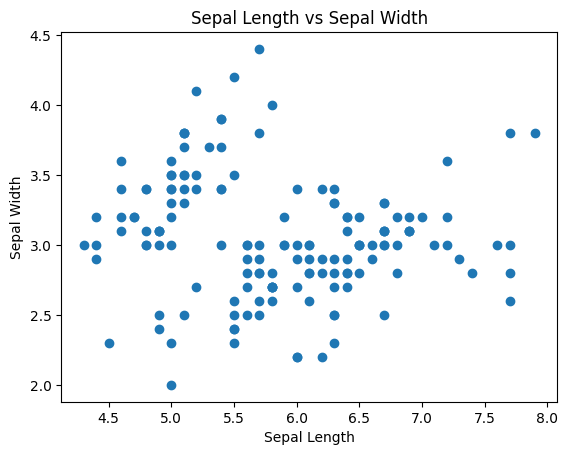

In [29]:
# Make a scatter plot of sepal_length vs sepal_width using Matplotlib. Label the axes and give the plot a title.

ax = plt.axes()
ax.scatter(data.sepal_length, data.sepal_width)
ax.set(
    xlabel = 'Sepal Length',
    ylabel = 'Sepal Width',
    title = 'Sepal Length vs Sepal Width'
)

[Text(0.5, 1.0, 'Distribution of Sepal Length')]

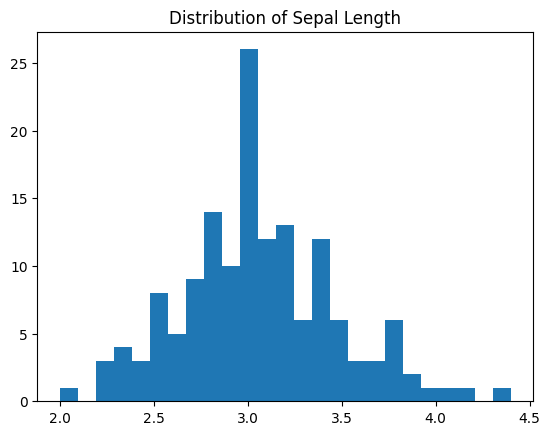

In [39]:
# Make a histogram of any one of the four features. Label axes and title it as appropriate.
ax = plt.axes()

ax.hist(data.sepal_width, bins=25)
ax.set(
    title = 'Distribution of Sepal Length'
)

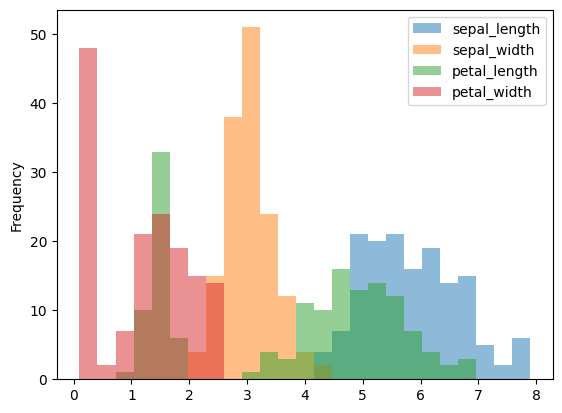

In [35]:
# create a single plot with histograms for each feature (petal_width, petal_length, sepal_width, sepal_length) overlayed.
ax = data.plot.hist(bins=25, alpha=0.5)

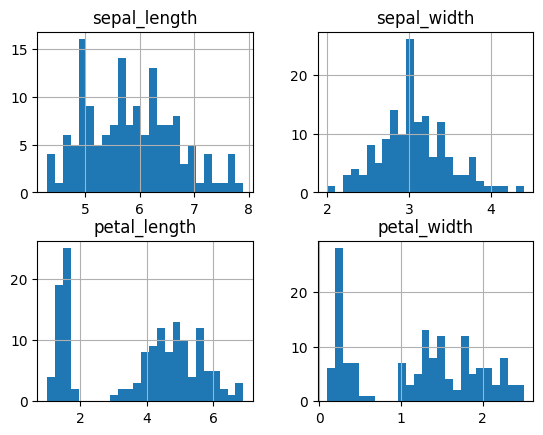

In [45]:
ax =data.hist(bins=25)


array([[<Axes: title={'center': 'petal_length'}, xlabel='[species]'>,
        <Axes: title={'center': 'petal_width'}, xlabel='[species]'>],
       [<Axes: title={'center': 'sepal_length'}, xlabel='[species]'>,
        <Axes: title={'center': 'sepal_width'}, xlabel='[species]'>]],
      dtype=object)

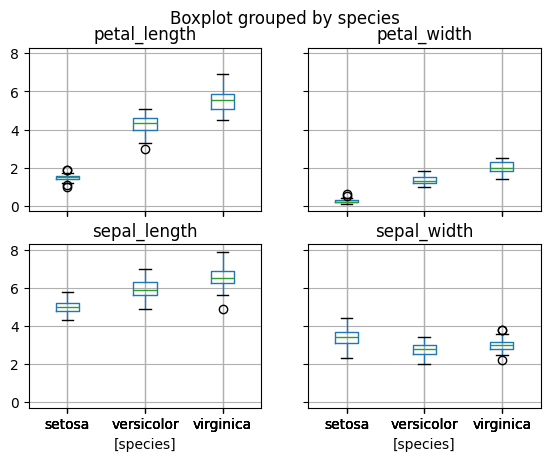

In [48]:
#Using Pandas, make a boxplot of each petal and sepal measurement. 
data.boxplot(by='species')

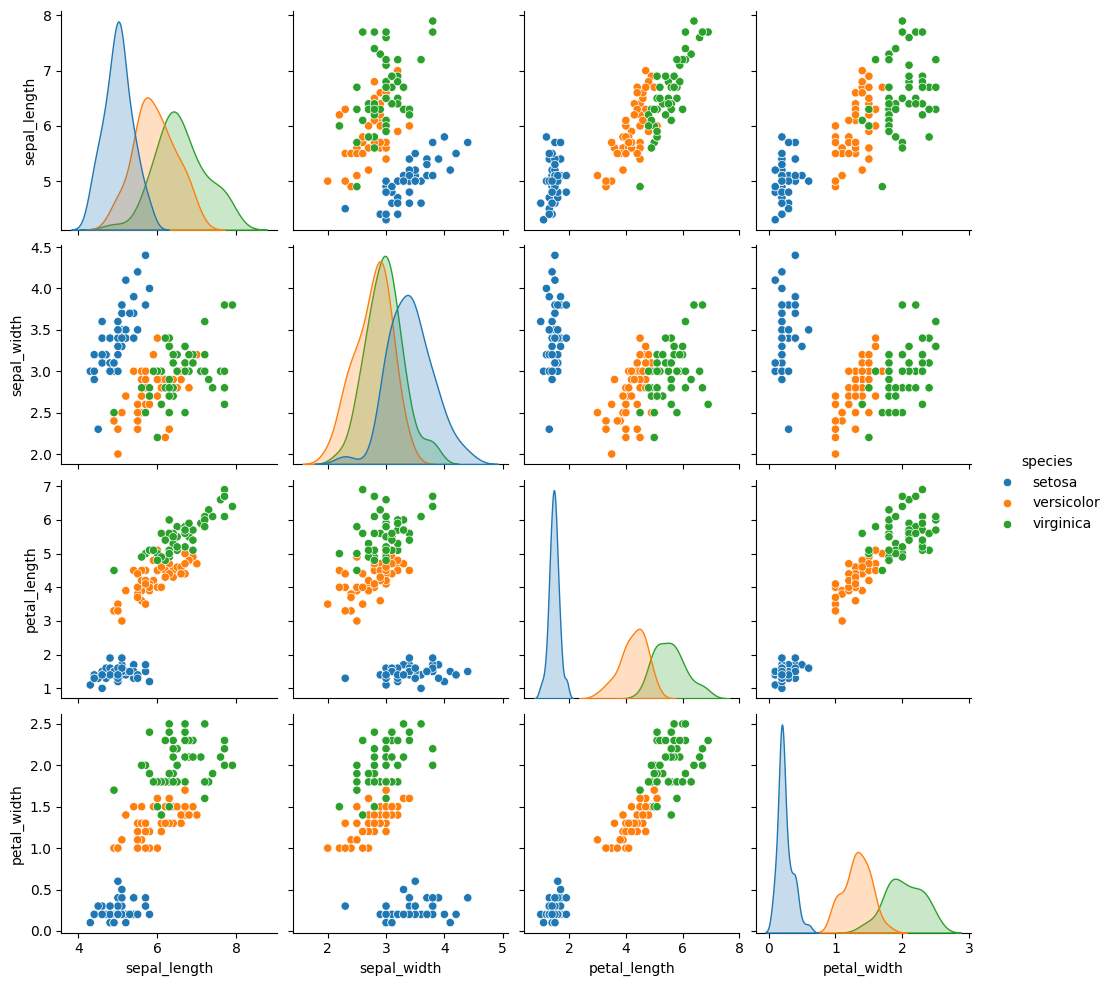

In [49]:
#Make a pairplot with Seaborn to examine the correlation between each of the measurements.
sns.pairplot(data, hue='species')